BioPandas

Author: Sebastian Raschka <mail@sebastianraschka.com>  
License: BSD 3 clause  
Project Website: http://rasbt.github.io/biopandas/  
Code Repository: https://github.com/rasbt/biopandas  

In [1]:
%load_ext watermark
%watermark -d -u -p pandas,biopandas

Last updated: 2025-11-05

pandas   : 2.3.3
biopandas: 0.6.0.dev0



In [2]:
from biopandas.pdb import PandasPdb
import pandas as pd
pd.set_option('display.width', 600)
pd.set_option('display.max_columns', 8)

# Working with PDB Structures in DataFrames

## Loading PDB Files

There are several ways to load a PDB structure into a `PandasPdb` object.


### 1 -- Loading a PDB file from the Protein Data Bank

PDB files can be directly fetched from The Protein Data Bank at [http://www.rcsb.org](http://www.rcsb.org) via its unique 4-letter after initializing a new [`PandasPdb`](../api_modules/biopandas.pdb/PandasPdb.md) object and calling the [`fetch_pdb`](../api_modules/biopandas.pdb/PandasPdb.md#fetch_pdb) method:

In [3]:
from biopandas.pdb import PandasPdb

# Initialize a new PandasPdb object
# and fetch the PDB file from rcsb.org
ppdb = PandasPdb().fetch_pdb('3eiy')

### 2 -- Loading a PDB file from the AlphaFold Structure Database


(*New in version 0.4.0*)

PDB files can be directly fetched from The AlphaFold Structure Database at [https://alphafold.ebi.ac.uk/](https://alphafold.ebi.ac.uk/) via its unique [UniProt](https://www.uniprot.org/) Identifier after initializing a new [`PandasPdb`](../api_modules/biopandas.pdb/PandasPdb.md) object and calling the [`fetch_af2`](../api_modules/biopandas.pdb/PandasPdb.md#fetch_pdb) method:

In [4]:
from biopandas.pdb import PandasPdb

# Initialize a new PandasPdb object
# and fetch the PDB file from alphafold.ebi.ac.uk
ppdb = PandasPdb().fetch_pdb(uniprot_id='Q5VSL9', source="alphafold2-v6")

In [5]:
ppdb.df["ATOM"]

,record_name,atom_number,blank_1,atom_name,...,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,...,,N,NaN,111
1,ATOM,2,,CA,...,,C,NaN,112
2,ATOM,3,,C,...,,C,NaN,113
3,ATOM,4,,CB,...,,C,NaN,114
4,ATOM,5,,O,...,,O,NaN,115
...,...,...,...,...,...,...,...,...,...
6713,ATOM,6714,,CG,...,,C,NaN,6824
6714,ATOM,6715,,CD,...,,C,NaN,6825
6715,ATOM,6716,,NE2,...,,N,NaN,6826
6716,ATOM,6717,,OE1,...,,O,NaN,6827


### 3 a) -- Loading a PDB structure from a local file


Alternatively, we can load PDB files from local directories as regular PDB files using [`read_pdb`](../api_modules/biopandas.pdb/PandasPdb.md#read_pdb):

In [6]:
ppdb.read_pdb('./data/3eiy.pdb')

[File link: [3eiy.pdb](https://raw.githubusercontent.com/rasbt/biopandas/main/docs/tutorials/data/3eiy.pdb)]

### 3 b) -- Loading a PDB structure from a local gzipped PDB file

Or, we can load them from gzip archives like so (note that the file must end with a '.gz' suffix in order to be recognized as a gzip file):

In [7]:
ppdb.read_pdb('./data/3eiy.pdb.gz')

[File link: [3eiy.pdb.gz](https://github.com/rasbt/biopandas/blob/main/docs/tutorials/data/3eiy.pdb.gz?raw=true)]

After the file was succesfully loaded, we have access to the following attributes:

In [8]:
print('PDB Code: %s' % ppdb.code)
print('PDB Header Line: %s' % ppdb.header)
print('\nRaw PDB file contents:\n\n%s\n...' % ppdb.pdb_text[:1000])

PDB Code: 3eiy
PDB Header Line:     HYDROLASE                               17-SEP-08   3EIY

Raw PDB file contents:

HEADER    HYDROLASE                               17-SEP-08   3EIY              
TITLE     CRYSTAL STRUCTURE OF INORGANIC PYROPHOSPHATASE FROM BURKHOLDERIA      
TITLE    2 PSEUDOMALLEI WITH BOUND PYROPHOSPHATE                                
COMPND    MOL_ID: 1;                                                            
COMPND   2 MOLECULE: INORGANIC PYROPHOSPHATASE;                                 
COMPND   3 CHAIN: A;                                                            
COMPND   4 EC: 3.6.1.1;                                                         
COMPND   5 ENGINEERED: YES                                                      
SOURCE    MOL_ID: 1;                                                            
SOURCE   2 ORGANISM_SCIENTIFIC: BURKHOLDERIA PSEUDOMALLEI 1710B;                
SOURCE   3 ORGANISM_TAXID: 320372;                                      

The most interesting / useful attribute is the [`PandasPdb.df`](../api_modules/biopandas.pdb/PandasPdb.md#df) DataFrame dictionary though, which gives us access to the PDB files as pandas DataFrames. Let's print the first 3 lines from the `ATOM` coordinate section to see how it looks like:

In [9]:
ppdb.df['ATOM'].head(3)

,record_name,atom_number,blank_1,atom_name,...,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,...,,N,NaN,609
1,ATOM,2,,CA,...,,C,NaN,610
2,ATOM,3,,C,...,,C,NaN,611


But more on that in the next section.

### 4 -- Loading a PDB file from a Python list

Since biopandas 0.3.0, PDB files can also be loaded into a PandasPdb object from a Python list:

In [10]:
with open('./data/3eiy.pdb', 'r') as f:
    three_eiy = f.readlines()

ppdb2 = PandasPdb()
ppdb2.read_pdb_from_list(three_eiy)

ppdb2.df['ATOM'].head()

,record_name,atom_number,blank_1,atom_name,...,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,...,,N,NaN,609
1,ATOM,2,,CA,...,,C,NaN,610
2,ATOM,3,,C,...,,C,NaN,611
3,ATOM,4,,O,...,,O,NaN,612
4,ATOM,5,,CB,...,,C,NaN,613


### 5 -- Obtaining a PDB file from a mmCIF structure

Since v0.5.0, it is now also possible to obtain a `PandasPdb` object from a mmCIF file, using `PandasMmcift`'s `PandasMmcif.get_pandas_pdb()`:

In [11]:
from biopandas.mmcif import PandasMmcif


mmcif = PandasMmcif().fetch_mmcif("3EIY")
pdb = mmcif.convert_to_pandas_pdb()

print("Type:", type(pdb))
pdb.df["ATOM"].head()

0       A
1       A
2       A
3       A
4       A
       ..
1325    A
1326    A
1327    A
1328    A
1329    A
Name: chain_id, Length: 1330, dtype: category
Categories (1, object): ['A']
Type: <class 'biopandas.pdb.pandas_pdb.PandasPdb'>


,record_name,atom_number,blank_1,atom_name,...,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,...,,N,NaN,0
1,ATOM,2,,CA,...,,C,NaN,1
2,ATOM,3,,C,...,,C,NaN,2
3,ATOM,4,,O,...,,O,NaN,3
4,ATOM,5,,CB,...,,C,NaN,4


## Looking at PDBs in DataFrames

PDB files are parsed according to the [PDB file format description](http://www.rcsb.org/pdb/static.do?p=file_formats/pdb/index.html). More specifically, BioPandas reads the columns of the ATOM and HETATM sections as shown in the following excerpt from [http://deposit.rcsb.org/adit/docs/pdb_atom_format.html#ATOM](http://deposit.rcsb.org/adit/docs/pdb_atom_format.html#ATOM).

| COLUMNS | DATA TYPE    | CONTENTS                                   | biopandas column name |
|---------|--------------|--------------------------------------------|-----------------------|
| 1 - 6   | Record name  | "ATOM"                                     | record_name           |
| 7 - 11  | Integer      | Atom serial number.                        | atom_number           |
| 12      |              |                                            | blank_1               |
| 13 - 16 | Atom         | Atom name.                                 | atom_name             |
| 17      | Character    | Alternate location indicator.              | alt_loc               |
| 18 - 20 | Residue name | Residue name.                              | residue_name          |
| 21      |              |                                            | blank_2               |
| 22      | Character    | Chain identifier.                          | chain_id              |
| 23 - 26 | Integer      | Residue sequence number.                   | residue_number        |
| 27      | AChar        | Code for insertion of residues.            | insertion             |
| 28 - 30 |              |                                            | blank_3               |
| 31 - 38 | Real(8.3)    | Orthogonal coordinates for X in Angstroms. | x_coord               |
| 39 - 46 | Real(8.3)    | Orthogonal coordinates for Y in Angstroms. | y_coord               |
| 47 - 54 | Real(8.3)    | Orthogonal coordinates for Z in Angstroms. | z_coord               |
| 55 - 60 | Real(6.2)    | Occupancy.                                 | occupancy             |
| 61 - 66 | Real(6.2)    | Temperature factor (Default = 0.0).        | bfactor               |
| 67-72   |              |                                            | blank_4               |
| 73 - 76 | LString(4)   | Segment identifier, left-justified.        | segment_id            |
| 77 - 78 | LString(2)   | Element symbol, right-justified.           | element_symbol        |
| 79 - 80 | LString(2)   | Charge on the atom.                        | charge                |

Below is an example of how this would look like in an actual PDB file:

    Example: 
             1         2         3         4         5         6         7         8
    12345678901234567890123456789012345678901234567890123456789012345678901234567890
    ATOM    145  N   VAL A  25      32.433  16.336  57.540  1.00 11.92      A1   N
    ATOM    146  CA  VAL A  25      31.132  16.439  58.160  1.00 11.85      A1   C
    ATOM    147  C   VAL A  25      30.447  15.105  58.363  1.00 12.34      A1   C
    ATOM    148  O   VAL A  25      29.520  15.059  59.174  1.00 15.65      A1   O
    ATOM    149  CB AVAL A  25      30.385  17.437  57.230  0.28 13.88      A1   C
    ATOM    150  CB BVAL A  25      30.166  17.399  57.373  0.72 15.41      A1   C
    ATOM    151  CG1AVAL A  25      28.870  17.401  57.336  0.28 12.64      A1   C
    ATOM    152  CG1BVAL A  25      30.805  18.788  57.449  0.72 15.11      A1   C
    ATOM    153  CG2AVAL A  25      30.835  18.826  57.661  0.28 13.58      A1   C
    ATOM    154  CG2BVAL A  25      29.909  16.996  55.922  0.72 13.25      A1   C

After loading a PDB file from rcsb.org or our local drive, the [`PandasPdb.df`](../api_modules/biopandas.pdb/PandasPdb.md#df) attribute should contain the following 4 DataFrame objects:

In [12]:
from biopandas.pdb import PandasPdb
ppdb = PandasPdb()
ppdb.read_pdb('./data/3eiy.pdb')
ppdb.df.keys()

dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])

[File link: [3eiy.pdb](https://raw.githubusercontent.com/rasbt/biopandas/main/docs/tutorials/data/3eiy.pdb)]

- 'ATOM': contains the entries from the ATOM coordinate section
- 'HETATM':  ... entries from the "HETATM" coordinate section    
- 'ANISOU': ... entries from the "ANISOU" coordinate section 
- 'OTHERS': Everything else that is *not* a 'ATOM', 'HETATM', or 'ANISOU' entry

![](./img/df_dict.jpg)

The columns of the 'HETATM' DataFrame are indentical to the 'ATOM' DataFrame that we've seen earlier:

In [13]:
ppdb.df['HETATM'].head(2)

,record_name,atom_number,blank_1,atom_name,...,segment_id,element_symbol,charge,line_idx
0,HETATM,1332,,K,...,,K,NaN,1940
1,HETATM,1333,,NA,...,,NA,NaN,1941


<br>

Note that "ANISOU" entries are handled a bit differently as specified at [http://deposit.rcsb.org/adit/docs/pdb_atom_format.html#ATOM](http://deposit.rcsb.org/adit/docs/pdb_atom_format.html#ATOM).

In [14]:
ppdb.df['ANISOU'].head(2)

,record_name,atom_number,blank_1,atom_name,...,blank_4,element_symbol,charge,line_idx


Not every PDB file contains ANISOU entries (similarly, some PDB files may only contain HETATM or ATOM entries). If records are basent, the DataFrame will be empty as show above.

In [15]:
ppdb.df['ANISOU'].empty

True

Since the DataFrames are fairly wide, let's us take a look at the columns by accessing the DataFrame's `column` attribute:

In [16]:
ppdb.df['ANISOU'].columns

Index(['record_name', 'atom_number', 'blank_1', 'atom_name', 'alt_loc', 'residue_name', 'blank_2', 'chain_id', 'residue_number', 'insertion', 'blank_3', 'U(1,1)', 'U(2,2)', 'U(3,3)', 'U(1,2)', 'U(1,3)', 'U(2,3)', 'blank_4', 'element_symbol', 'charge', 'line_idx'], dtype='object')

ANISOU records are very similar to ATOM/HETATM records. In fact, the columns 7 - 27 and 73 - 80 are identical to their corresponding ATOM/HETATM records, which means that the 'ANISOU' DataFrame doesn't have the following entries:

In [17]:
set(ppdb.df['ATOM'].columns).difference(set(ppdb.df['ANISOU'].columns))

{'b_factor', 'occupancy', 'segment_id', 'x_coord', 'y_coord', 'z_coord'}

Instead, the "ANISOU" DataFrame contains the anisotropic temperature factors "U(-,-)" -- note that these are scaled by a factor of $10^4$ ($\text{Angstroms}^2$) by convention.

In [18]:
set(ppdb.df['ANISOU'].columns).difference(set(ppdb.df['ATOM'].columns))

{'U(1,1)', 'U(1,2)', 'U(1,3)', 'U(2,2)', 'U(2,3)', 'U(3,3)'}

<br>
<br>

Ah, another interesting thing to mention is that the columns already come with the types you'd expect (where `object` essentially "means" `str` here):

In [19]:
ppdb.df['ATOM'].dtypes

record_name        object
atom_number         int64
blank_1            object
atom_name          object
alt_loc            object
residue_name       object
blank_2            object
chain_id           object
residue_number      int64
insertion          object
blank_3            object
x_coord           float64
y_coord           float64
z_coord           float64
occupancy         float64
b_factor          float64
blank_4            object
segment_id         object
element_symbol     object
charge            float64
line_idx            int64
dtype: object

<br>

Typically, all good things come in threes, however, there is a 4th DataFrame, an'OTHER' DataFrame, which contains everything that wasn't parsed as 'ATOM', 'HETATM', or 'ANISOU' coordinate section:

In [20]:
ppdb.df['OTHERS'].head(5)

,record_name,entry,line_idx
0,HEADER,HYDROLASE 17...,0
1,TITLE,CRYSTAL STRUCTURE OF INORGANIC PYROPHOSPHA...,1
2,TITLE,2 PSEUDOMALLEI WITH BOUND PYROPHOSPHATE,2
3,COMPND,MOL_ID: 1;,3
4,COMPND,2 MOLECULE: INORGANIC PYROPHOSPHATASE;,4


Although these 'OTHER' entries are typically less useful for structure-related computations, you may still want to take a look at them to get a short summary of the PDB structure and learn about it's potential quirks and gotchas (typically listed in the REMARKs section). Lastly, the "OTHERS" DataFrame comes in handy if we want to reconstruct the structure as PDB file as we will see later (note the `line_idx` columns in all of the DataFrames).

## Working with PDB DataFrames

In the previous sections, we've seen how to load PDB structures into DataFrames, and how to access them. Now, let's talk about manipulating PDB files in DataFrames.

In [21]:
from biopandas.pdb import PandasPdb
ppdb = PandasPdb()
ppdb.read_pdb('./data/3eiy.pdb.gz')
ppdb.df['ATOM'].head()

,record_name,atom_number,blank_1,atom_name,...,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,...,,N,NaN,609
1,ATOM,2,,CA,...,,C,NaN,610
2,ATOM,3,,C,...,,C,NaN,611
3,ATOM,4,,O,...,,O,NaN,612
4,ATOM,5,,CB,...,,C,NaN,613


[File link: [3eiy.pdb.gz](https://github.com/rasbt/biopandas/blob/main/docs/tutorials/data/3eiy.pdb.gz?raw=true)]

Okay, there's actually not *that* much to say ...   
Once we have our PDB file in the DataFrame format, we have the whole convenience of [pandas](http://pandas.pydata.org) right there at our fingertips.

For example, let's get all Proline residues:

In [22]:
ppdb.df['ATOM'][ppdb.df['ATOM']['residue_name'] == 'PRO'].head()

,record_name,atom_number,blank_1,atom_name,...,segment_id,element_symbol,charge,line_idx
38,ATOM,39,,N,...,,N,NaN,647
39,ATOM,40,,CA,...,,C,NaN,648
40,ATOM,41,,C,...,,C,NaN,649
41,ATOM,42,,O,...,,O,NaN,650
42,ATOM,43,,CB,...,,C,NaN,651


Or main chain atoms:

In [23]:
ppdb.df['ATOM'][ppdb.df['ATOM']['atom_name'] == 'C'].head()

,record_name,atom_number,blank_1,atom_name,...,segment_id,element_symbol,charge,line_idx
2,ATOM,3,,C,...,,C,NaN,611
8,ATOM,9,,C,...,,C,NaN,617
19,ATOM,20,,C,...,,C,NaN,628
25,ATOM,26,,C,...,,C,NaN,634
33,ATOM,34,,C,...,,C,NaN,642


It's also easy to strip our coordinate section from hydrogen atoms if there are any ...

In [24]:
ppdb.df['ATOM'][ppdb.df['ATOM']['element_symbol'] != 'H'].head()

,record_name,atom_number,blank_1,atom_name,...,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,...,,N,NaN,609
1,ATOM,2,,CA,...,,C,NaN,610
2,ATOM,3,,C,...,,C,NaN,611
3,ATOM,4,,O,...,,O,NaN,612
4,ATOM,5,,CB,...,,C,NaN,613


Or, let's compute the average temperature factor of our protein main chain:

In [25]:
mainchain = ppdb.df['ATOM'][(ppdb.df['ATOM']['atom_name'] == 'C') | 
                            (ppdb.df['ATOM']['atom_name'] == 'O') | 
                            (ppdb.df['ATOM']['atom_name'] == 'N') | 
                            (ppdb.df['ATOM']['atom_name'] == 'CA')]

bfact_mc_avg = mainchain['b_factor'].mean()
print('Average B-Factor [Main Chain]: %.2f' % bfact_mc_avg)

Average B-Factor [Main Chain]: 28.83


**Loading PDB files from a Python List**

Since biopandas 0.3.0, PDB files can also be loaded into a PandasPdb object from a Python list:

In [26]:
with open('./data/3eiy.pdb', 'r') as f:
    three_eiy = f.readlines()

ppdb2 = PandasPdb()
ppdb2.read_pdb_from_list(three_eiy)

ppdb2.df['ATOM'].head()

,record_name,atom_number,blank_1,atom_name,...,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,...,,N,NaN,609
1,ATOM,2,,CA,...,,C,NaN,610
2,ATOM,3,,C,...,,C,NaN,611
3,ATOM,4,,O,...,,O,NaN,612
4,ATOM,5,,CB,...,,C,NaN,613


### Working with PDBs Containing Multiple Models

(*New in version 0.4.0*)

Some PDB files, particularly those containing NMR structures, provide an ensemble of models. There are various ways to extract these.

In these examples we will work with [2JYF](https://www.rcsb.org/structure/2JYF): an RNA structure containing 10 models of the same underlying RNA structure.

To start, we con obtain a DataFrame denoting the lines of the PDB files corresponding to each model.

In [27]:
from biopandas.pdb import PandasPdb

ppdb = PandasPdb().read_pdb('./data/2jyf.pdb')
ppdb.get_model_start_end()

,record_name,model_idx,start_idx,end_idx
129,MODEL,1,129,2896
133,MODEL,2,2897,5664
137,MODEL,3,5665,8432
141,MODEL,4,8433,11200
145,MODEL,5,11201,13968
149,MODEL,6,13969,16736
153,MODEL,7,16737,19504
157,MODEL,8,19505,22272
161,MODEL,9,22273,25040
165,MODEL,10,25041,27808


**Assigning model IDs to the PDB DataFrames**

For ease of use, the `label_models()` method adds an additional column, `"model_id"` to the dataframes contained within the `PandasPdb` object.

In [28]:
from biopandas.pdb import PandasPdb
ppdb = PandasPdb().read_pdb('./data/2jyf.pdb')

ppdb.label_models()
ppdb.df["ATOM"]["model_id"]

0         1
1         1
2         1
3         1
4         1
         ..
27635    10
27636    10
27637    10
27638    10
27639    10
Name: model_id, Length: 27640, dtype: int64

**Subsetting `PandasPdb` objects to a given model**

We can obtain new `PandasPdb` objects containing only a given model using the `get_model()` method

In [29]:
from biopandas.pdb import PandasPdb
ppdb = PandasPdb().read_pdb('./data/2jyf.pdb')

model_4 = ppdb.get_model(model_index=4)
model_4.df["ATOM"]

,record_name,atom_number,blank_1,atom_name,...,element_symbol,charge,line_idx,model_id
8292,ATOM,1,,O5',...,O,NaN,8434,4
8293,ATOM,2,,C5',...,C,NaN,8435,4
8294,ATOM,3,,C4',...,C,NaN,8436,4
8295,ATOM,4,,O4',...,O,NaN,8437,4
8296,ATOM,5,,C3',...,C,NaN,8438,4
...,...,...,...,...,...,...,...,...,...
11051,ATOM,2761,,HO2',...,H,NaN,11194,4
11052,ATOM,2762,,H1',...,H,NaN,11195,4
11053,ATOM,2763,,H3,...,H,NaN,11196,4
11054,ATOM,2764,,H5,...,H,NaN,11197,4


**Subsetting `PandasPdb` objects to a list of given models**

We can obtain new `PandasPdb` objects containing only a given models using the `get_models()` method

In [30]:
from biopandas.pdb import PandasPdb
ppdb = PandasPdb().read_pdb('./data/2jyf.pdb')

model_ensemble = ppdb.get_models(model_indices=[2, 4, 6, 8])
model_ensemble.df["ATOM"]

,record_name,atom_number,blank_1,atom_name,...,element_symbol,charge,line_idx,model_id
2764,ATOM,1,,O5',...,O,NaN,2898,2
2765,ATOM,2,,C5',...,C,NaN,2899,2
2766,ATOM,3,,C4',...,C,NaN,2900,2
2767,ATOM,4,,O4',...,O,NaN,2901,2
2768,ATOM,5,,C3',...,C,NaN,2902,2
...,...,...,...,...,...,...,...,...,...
22107,ATOM,2761,,HO2',...,H,NaN,22266,8
22108,ATOM,2762,,H1',...,H,NaN,22267,8
22109,ATOM,2763,,H3,...,H,NaN,22268,8
22110,ATOM,2764,,H5,...,H,NaN,22269,8


## Plotting

Since we are using pandas under the hood, which in turns uses matplotlib under the hood, we can produce quick summary plots of our PDB structures relatively conveniently:

In [31]:
from biopandas.pdb import PandasPdb
ppdb = PandasPdb().read_pdb('./data/3eiy.pdb.gz')

[File link: [3eiy.pdb.gz](https://github.com/rasbt/biopandas/blob/main/docs/tutorials/data/3eiy.pdb.gz?raw=true)]

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

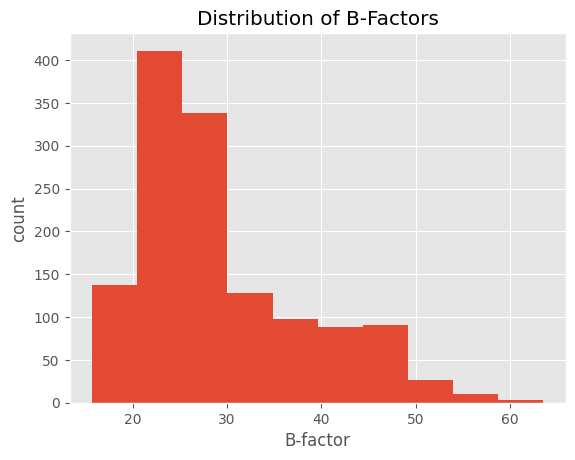

In [33]:
ppdb.df['ATOM']['b_factor'].plot(kind='hist')
plt.title('Distribution of B-Factors')
plt.xlabel('B-factor')
plt.ylabel('count')
plt.show()

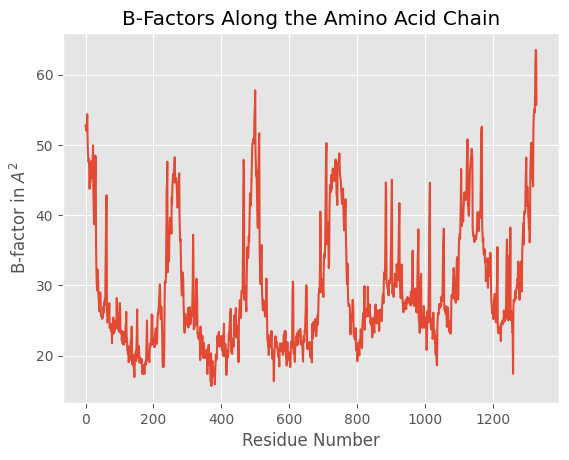

In [34]:
ppdb.df['ATOM']['b_factor'].plot(kind='line')
plt.title('B-Factors Along the Amino Acid Chain')
plt.xlabel('Residue Number')
plt.ylabel('B-factor in $A^2$')
plt.show()

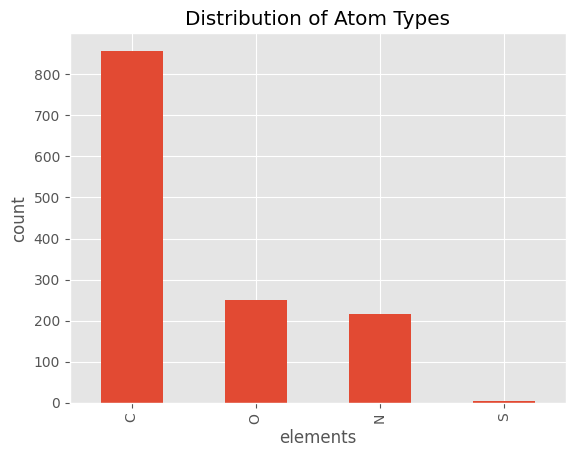

In [35]:
ppdb.df['ATOM']['element_symbol'].value_counts().plot(kind='bar')
plt.title('Distribution of Atom Types')
plt.xlabel('elements')
plt.ylabel('count')
plt.show()

## Computing the Root Mean Square Deviation

BioPandas also comes with certain convenience functions, for example, ...

The Root-mean-square deviation (RMSD) is simply a measure of the average distance between atoms of 2 protein or ligand structures. This calculation of the Cartesian error follows the equation:

$$
RMSD(a, b) = \sqrt{\frac{1}{n} \sum^{n}_{i=1} \big((a_{ix})^2 + (a_{iy})^2 + (a_{iz})^2 \big)}
= \sqrt{\frac{1}{n} \sum^{n}_{i=1} || a_i + b_i||_2^2}
$$

So, assuming that the we have the following 2 conformations of a ligand molecule

![](./img/ligand_rmsd.png)

we can compute the RMSD as follows:

In [36]:
from biopandas.pdb import PandasPdb

l_1 = PandasPdb().read_pdb('./data/lig_conf_1.pdb')
l_2 = PandasPdb().read_pdb('./data/lig_conf_2.pdb')
r = PandasPdb.rmsd(l_1.df['HETATM'], l_2.df['HETATM'],
                   s=None) # all atoms, including hydrogens
print('RMSD: %.4f Angstrom' % r)

RMSD: 2.6444 Angstrom


In [37]:
l_1.df['HETATM']

,record_name,atom_number,blank_1,atom_name,...,segment_id,element_symbol,charge,line_idx
0,HETATM,1,,C1,...,,C,NaN,0
1,HETATM,2,,O1,...,,O,NaN,1
2,HETATM,3,,C2,...,,C,NaN,2
3,HETATM,4,,O2,...,,O,NaN,3
4,HETATM,5,,C3,...,,C,NaN,4
5,HETATM,6,,O3,...,,O,NaN,5
6,HETATM,7,,C4,...,,C,NaN,6
7,HETATM,8,,O4,...,,O,NaN,7
8,HETATM,9,,C5,...,,C,NaN,8
9,HETATM,10,,O5,...,,O,NaN,9


[File links: [lig_conf_1.pdb](https://raw.githubusercontent.com/rasbt/biopandas/master/docs/sources/tutorials/data/lig_conf_1.pdb), [lig_conf_2.pdb](https://raw.githubusercontent.com/rasbt/biopandas/master/docs/sources/tutorials/data/lig_conf_2.pdb)]

In [38]:
r = PandasPdb.rmsd(l_1.df['HETATM'], l_2.df['HETATM'], 
                   s='carbon') # carbon atoms only
print('RMSD: %.4f Angstrom' % r)

RMSD: 1.7249 Angstrom


In [39]:
r = PandasPdb.rmsd(l_1.df['HETATM'], l_2.df['HETATM'], 
                   s='heavy') # heavy atoms only
print('RMSD: %.4f Angstrom' % r)

RMSD: 1.9959 Angstrom


Similarly, we can compute the RMSD between 2 related protein structures:

![](./img/1t48_rmsd.png)

The hydrogen-free RMSD:

In [40]:
p_1 = PandasPdb().read_pdb('./data/1t48_995.pdb')
p_2 = PandasPdb().read_pdb('./data/1t49_995.pdb')
r = PandasPdb.rmsd(p_1.df['ATOM'], p_2.df['ATOM'], s='heavy')
print('RMSD: %.4f Angstrom' % r)

RMSD: 0.7377 Angstrom


Or the RMSD between the main chains only:

In [41]:
p_1 = PandasPdb().read_pdb('./data/1t48_995.pdb')
p_2 = PandasPdb().read_pdb('./data/1t49_995.pdb')
r = PandasPdb.rmsd(p_1.df['ATOM'], p_2.df['ATOM'], s='main chain')
print('RMSD: %.4f Angstrom' % r)

RMSD: 0.4781 Angstrom


<br>

## Filtering PDBs by Distance

We can use the `distance` method to compute the distance between each atom (or a subset of atoms) in our data frame and a three-dimensional reference point. For example:

In [42]:
p_1 = PandasPdb().read_pdb('./data/3eiy.pdb')

reference_point = (9.362, 41.410, 10.542)
distances = p_1.distance(xyz=reference_point, records=('ATOM',))

[File link: [3eiy.pdb](https://raw.githubusercontent.com/rasbt/biopandas/main/docs/tutorials/data/3eiy.pdb)]

The distance method returns a Pandas Series object:

In [43]:
distances.head()

0    19.267419
1    18.306060
2    16.976934
3    16.902897
4    18.124171
dtype: float64

And we can use this `Series` object, for instance, to select certain atoms in our DataFrame that fall within a desired distance threshold. For example, let's select all atoms that are within 7A of our reference point: 

In [44]:
all_within_7A = p_1.df['ATOM'][distances < 7.0]
all_within_7A.tail()

,record_name,atom_number,blank_1,atom_name,...,segment_id,element_symbol,charge,line_idx
786,ATOM,787,,CB,...,,C,NaN,1395
787,ATOM,788,,CG,...,,C,NaN,1396
788,ATOM,789,,CD1,...,,C,NaN,1397
789,ATOM,790,,CD2,...,,C,NaN,1398
790,ATOM,791,,N,...,,N,NaN,1399


Visualized in PyMOL, this subset (yellow surface) would look as follows:
    
![](./img/3eiy_7a.png)

## Converting Amino Acid codes from 3- to 1-letter codes

Residues in the `residue_name` field can be converted into 1-letter amino acid codes, which may be useful for further sequence analysis, for example, pair-wise or multiple sequence alignments:

In [45]:
from biopandas.pdb import PandasPdb
ppdb = PandasPdb().fetch_pdb('5mtn')
sequence = ppdb.amino3to1()
sequence.tail()

,chain_id,residue_name
1378,B,I
1386,B,N
1394,B,Y
1406,B,R
1417,B,T


As shown above, the `amino3to1` method returns a `DataFrame` containing the `chain_id` and `residue_name` of the translated 1-letter amino acids. If you like to work with the sequence as a Python list of string characters, you could do the following:

In [46]:
sequence_list = list(sequence.loc[sequence['chain_id'] == 'A', 'residue_name'])
sequence_list[-5:] # last 5 residues of chain A

['V', 'R', 'H', 'Y', 'T']

And if you prefer to work with the sequence as a string, you can use the `join` method: 

In [47]:
''.join(sequence.loc[sequence['chain_id'] == 'A', 'residue_name'])

'SLEPEPWFFKNLSRKDAERQLLAPGNTHGSFLIRESESTAGSFSLSVRDFDQGEVVKHYKIRNLDNGGFYISPRITFPGLHELVRHYT'

To iterate over the sequences of multi-chain proteins, you can use the `unique` method as shown below:

In [48]:
for chain_id in sequence['chain_id'].unique():
    print('\nChain ID: %s' % chain_id)
    print(''.join(sequence.loc[sequence['chain_id'] == chain_id, 'residue_name']))


Chain ID: A
SLEPEPWFFKNLSRKDAERQLLAPGNTHGSFLIRESESTAGSFSLSVRDFDQGEVVKHYKIRNLDNGGFYISPRITFPGLHELVRHYT

Chain ID: B
SVSSVPTKLEVVAATPTSLLISWDAPAVTVVYYLITYGETGSPWPGGQAFEVPGSKSTATISGLKPGVDYTITVYAHRSSYGYSENPISINYRT


## Wrapping it up - Saving PDB structures

Finally, let's talk about how to get the PDB structures out of the DataFrame format back into the beloved .pdb format.

Let's say we loaded a PDB structure, removed it from its hydrogens:

In [49]:
from biopandas.pdb import PandasPdb
ppdb = PandasPdb().read_pdb('./data/3eiy.pdb.gz')
ppdb.df['ATOM'] = ppdb.df['ATOM'][ppdb.df['ATOM']['element_symbol'] != 'H']

[File link: [3eiy.pdb.gz](https://github.com/rasbt/biopandas/blob/main/docs/tutorials/data/3eiy.pdb.gz?raw=true)]

We can save the file using the [`PandasPdb.to_pdb`](../api_modules/biopandas.pdb/PandasPdb.md#to_pdb) method:

In [50]:
ppdb.to_pdb(path='./data/3eiy_stripped.pdb', 
            records=None, 
            gz=False, 
            append_newline=True)

[File link: [3eiy_stripped.pdb](https://raw.githubusercontent.com/rasbt/biopandas/main/docs/tutorials/data/3eiy_stripped.pdb)]

By default, all records (that is, 'ATOM', 'HETATM', 'OTHERS', 'ANISOU') are written if we set `records=None`. Alternatively, let's say we want to get rid of the 'ANISOU' entries and produce a compressed gzip archive of our PDB structure:

In [51]:
ppdb.to_pdb(path='./data/3eiy_stripped.pdb.gz', 
            records=['ATOM', 'HETATM', 'OTHERS'], 
            gz=True, 
            append_newline=True)

[File link: [3eiy_stripped.pdb.gz](https://github.com/rasbt/biopandas/blob/main/docs/tutorials/data/3eiy_stripped.pdb.gz?raw=true)]